In [1]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools

In [6]:
# Plot evolution of net flux and temperature to see how long it takes to spin up
def plot_spinup(d, ax, albedo):
    olr_sum = d.olr.sum(dim = ['lon','lat'])
    short_wave_sum = d.swdn_toa.sum(dim = ['lon','lat'])
    net_flux = olr_sum - short_wave_sum*(1-albedo)    # Include surface albedo in net flux
    net_flux.plot.line(ax=ax, color='b')
    ax.set_ylabel('TOA Net Outgoing FLux / $Wm^{-2}$\nOLR - (1-$\\alpha)SW$', color='b')
    t_surf_mean = d.t_surf.mean(dim = ['lon','lat']) - 273.15  # In Celsius
    ax2 = ax.twinx()
    t_surf_mean.plot.line(ax=ax2, color='r')
    ax2.set_ylabel('Surface Temperature / $°C$', color='r')


In [19]:
# Load dataset across all months for each depth value
depth_values = [1, 5, 10]    # mixed layer depths in meters
exp_names = [f'aquaplanet/d{depth_values[i]}' for i in range(len(depth_values))]
datasets = [isca_tools.load_dataset(exp_name) for exp_name in exp_names]
namelist = isca_tools.load_namelist(exp_names[0])  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']

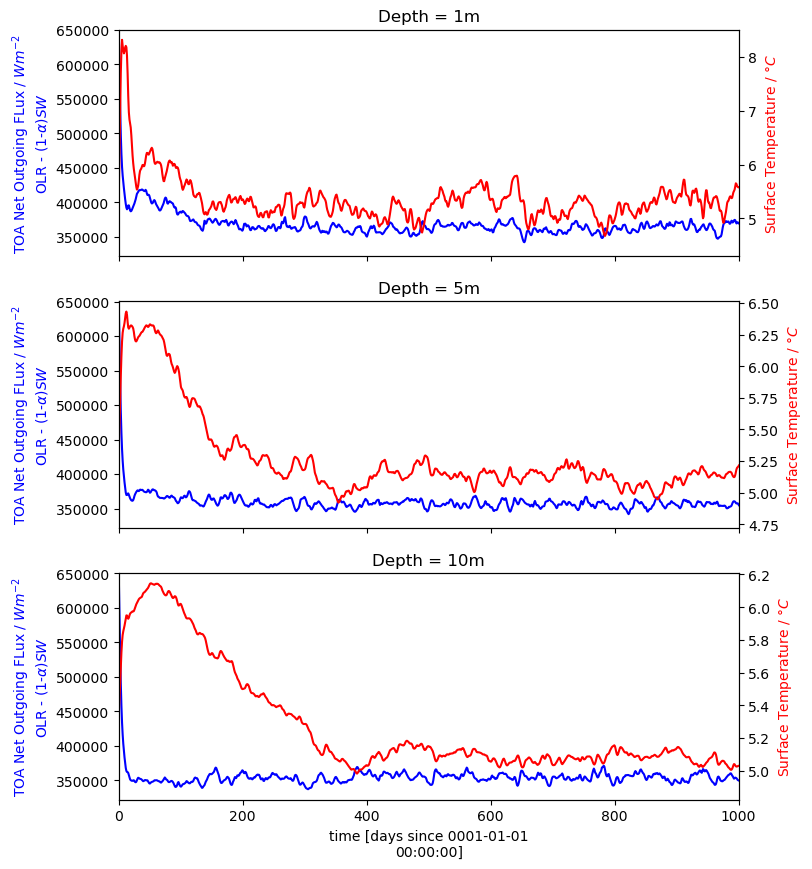

In [20]:
# Plot spinup time for each depth value
fig, axs = plt.subplots(3,1, figsize=(8, 10), sharex=True, sharey=True)
for i in range(len(datasets)):
    plot_spinup(datasets[i], axs[i], albedo)
axs[0].set_xlim([0,1000]);
axs[0].set_xlabel('');
axs[1].set_xlabel('');
for i in range(len(depth_values)):
    axs[i].set_title(f"Depth = {depth_values[i]}m")

I think the TOA Net Outgoing Flux does not converge towards 0 because there is shortwave optical depth, as set by `atm_abs=0.2` in the `two_stream_gray_rad_nml` meaning short wave flux gets absorbed by atmosphere and not all reaches the surface. It then gets reflected by the surface due to the `albedo_value=0.31`. The reflected radiation gets absorbed by the atmosphere on its way back out to space. This effectively reduces the albedo of the planet below that of the surface so that the TOA net flux is positive if I use the surface value. If I set the albedo to 0.15, in the above plot then it does converge to 0.